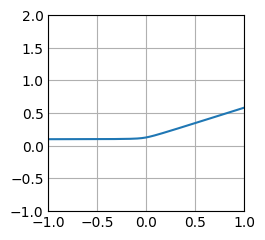

0.12495399180615203


In [3]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def dXdt(Z, t):
    k = 8.99 * 10**9
    q = 10**(-7)
    Q = 10**(-5)
    m = 10**(-5)
    x, dxdt, y, dydt = Z
    return [dxdt, k*q*Q*x/(m*(x**2+y**2)**1.5), dydt, k*q*Q*y/(m*(x**2+y**2)**1.5)]

# values at time 0
x_0 = -200
dxdt_0 = 200
y_0 = 0.1
dydt_0 = 0

# Vector of independent variable
t = np.linspace(0, 10, 10**6)

# Solution
sol = odeint(dXdt, (x_0, dxdt_0, y_0, dydt_0), t)

x_list = [i[0] for i in sol]
y_list = [i[2] for i in sol]

plt.style.use('_mpl-gallery')

# plot
fig, ax = plt.subplots()
ax.plot(x_list, y_list, markeredgewidth=2)
ax.set(xlim=(-1, 1), ylim=(-1, 2))

plt.show()

distances = [(x**2 + y**2)**0.5 for x, y in zip(x_list, y_list)]
print(min(distances))


In [2]:
from sympy import * 

k, q, Q, m, d, v0, vmin, dmin = symbols("k, q, Q, m, d, v0, vmin, dmin")

k = 8.99 * 10**9
q = 10**(-7)
Q = 10**(-5)
m = 10**(-5)
d = 0.1
v0 = 200

eq1 = Eq(m*v0*d, m*vmin*dmin) 
eq2 = Eq(m*v0**2/2,m*vmin**2/2+k*Q*q/dmin) 

solve([eq1,eq2], dict=True)


[{dmin: -0.0800195150971504, vmin: -249.939030194301},
 {dmin: 0.124969515097150, vmin: 160.039030194301}]

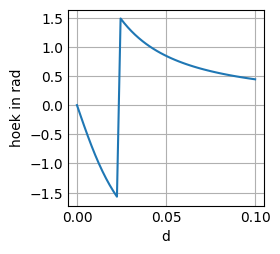

In [19]:
def dZdt(Z, t):
    k = 8.99 * 10**9
    q = 10**(-7)
    Q = 10**(-5)
    m = 10**(-5)
    x, dxdt, y, dydt = Z
    return [dxdt, k*q*Q*x/(m*(x**2+y**2)**1.5), dydt, k*q*Q*y/(m*(x**2+y**2)**1.5)]

def bereken_hoek(d):
    # values at time 0
    x_0 = -200
    dxdt_0 = 200
    y_0 = d
    dydt_0 = 0
    
    # Vector of independent variable
    t = np.linspace(0, 10, 10**6)
    
    # Solution
    sol = odeint(dZdt, (x_0, dxdt_0, y_0, dydt_0), t)
    
    x_list = [i[0] for i in sol]
    y_list = [i[2] for i in sol]
    
    return np.arctan(y_list[-1]/x_list[-1])

# Vector of independent variable
d = np.linspace(0, 0.1, 50)
hoek_list = list(map(bereken_hoek, d))
hoek_list

# plot
fig, ax = plt.subplots()
ax.set_xlabel("d")
ax.set_ylabel("hoek in rad")


ax.plot(d, hoek_list, markeredgewidth=2)

plt.show()
